In [12]:
import duckdb
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = duckdb.connect(database='../database/database_32M.db')

In [3]:
conn.execute(
    """
    create table if not exists movies_table as select * from '../results/movies32M.parquet'
    """
)

df_movies = conn.execute("SELECT * FROM movies_table").pl()
print(df_movies)

shape: (87_550, 21)
┌─────────┬─────────────────────────────┬────────┬────────┬───┬────────┬──────────┬─────┬─────────┐
│ movieId ┆ title                       ┆ year   ┆ Action ┆ … ┆ Sci-Fi ┆ Thriller ┆ War ┆ Western │
│ ---     ┆ ---                         ┆ ---    ┆ ---    ┆   ┆ ---    ┆ ---      ┆ --- ┆ ---     │
│ i64     ┆ str                         ┆ f64    ┆ i64    ┆   ┆ i64    ┆ i64      ┆ i64 ┆ i64     │
╞═════════╪═════════════════════════════╪════════╪════════╪═══╪════════╪══════════╪═════╪═════════╡
│ 1       ┆ Toy Story                   ┆ 1995.0 ┆ 0      ┆ … ┆ 0      ┆ 0        ┆ 0   ┆ 0       │
│ 2       ┆ Jumanji                     ┆ 1995.0 ┆ 0      ┆ … ┆ 0      ┆ 0        ┆ 0   ┆ 0       │
│ 3       ┆ Grumpier Old Men            ┆ 1995.0 ┆ 0      ┆ … ┆ 0      ┆ 0        ┆ 0   ┆ 0       │
│ 4       ┆ Waiting to Exhale           ┆ 1995.0 ┆ 0      ┆ … ┆ 0      ┆ 0        ┆ 0   ┆ 0       │
│ 5       ┆ Father of the Bride Part II ┆ 1995.0 ┆ 0      ┆ … ┆ 0      ┆ 0      

In [4]:
conn.execute(
    """
    create table if not exists links_table as select * from '../results/links32M.parquet'
    """
)

df_links = conn.execute("SELECT * FROM links_table").pl()
print(df_links)

shape: (87_585, 3)
┌─────────┬──────────┬────────────┐
│ movieId ┆ imdbId   ┆ tmdbId     │
│ ---     ┆ ---      ┆ ---        │
│ i64     ┆ i64      ┆ f64        │
╞═════════╪══════════╪════════════╡
│ 1       ┆ 114709   ┆ 862.0      │
│ 2       ┆ 113497   ┆ 8844.0     │
│ 3       ┆ 113228   ┆ 15602.0    │
│ 4       ┆ 114885   ┆ 31357.0    │
│ 5       ┆ 113041   ┆ 11862.0    │
│ …       ┆ …        ┆ …          │
│ 292731  ┆ 26812510 ┆ 1.032473e6 │
│ 292737  ┆ 14907358 ┆ 986674.0   │
│ 292753  ┆ 12388280 ┆ 948139.0   │
│ 292755  ┆ 64027    ┆ 182776.0   │
│ 292757  ┆ 28995566 ┆ 1.174725e6 │
└─────────┴──────────┴────────────┘


In [5]:
conn.execute(
    """
    create table if not exists tags_table as select * from '../results/tags32M.parquet'
    """
)

df_tags = conn.execute("SELECT * FROM tags_table").pl()
print(df_tags)

shape: (2_000_055, 7)
┌────────┬─────────┬────────────────┬────────────┬─────────────────────┬──────────┬───────────┐
│ userId ┆ movieId ┆ tag            ┆ timestamp  ┆ tag_date            ┆ tag_year ┆ tag_month │
│ ---    ┆ ---     ┆ ---            ┆ ---        ┆ ---                 ┆ ---      ┆ ---       │
│ i64    ┆ i64     ┆ str            ┆ i64        ┆ datetime[ns]        ┆ i32      ┆ i32       │
╞════════╪═════════╪════════════════╪════════════╪═════════════════════╪══════════╪═══════════╡
│ 22     ┆ 26479   ┆ kevin kline    ┆ 1583038886 ┆ 2020-03-01 05:01:26 ┆ 2020     ┆ 3         │
│ 22     ┆ 79592   ┆ misogyny       ┆ 1581476297 ┆ 2020-02-12 02:58:17 ┆ 2020     ┆ 2         │
│ 22     ┆ 247150  ┆ acrophobia     ┆ 1622483469 ┆ 2021-05-31 17:51:09 ┆ 2021     ┆ 5         │
│ 34     ┆ 2174    ┆ music          ┆ 1249808064 ┆ 2009-08-09 08:54:24 ┆ 2009     ┆ 8         │
│ 34     ┆ 2174    ┆ weird          ┆ 1249808102 ┆ 2009-08-09 08:55:02 ┆ 2009     ┆ 8         │
│ …      ┆ …      

In [6]:
conn.execute(
    """
    create table if not exists ratings_table as select * from '../results/ratings32M.parquet'
    """
)

df_ratings = conn.execute("SELECT * FROM ratings_table").pl()
print(df_ratings)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

shape: (32_000_204, 7)
┌────────┬─────────┬────────┬────────────┬─────────────────────┬─────────────┬──────────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp  ┆ rating_date         ┆ rating_year ┆ rating_month │
│ ---    ┆ ---     ┆ ---    ┆ ---        ┆ ---                 ┆ ---         ┆ ---          │
│ i64    ┆ i64     ┆ f64    ┆ i64        ┆ datetime[ns]        ┆ i32         ┆ i32          │
╞════════╪═════════╪════════╪════════════╪═════════════════════╪═════════════╪══════════════╡
│ 1      ┆ 17      ┆ 4.0    ┆ 944249077  ┆ 1999-12-03 19:24:37 ┆ 1999        ┆ 12           │
│ 1      ┆ 25      ┆ 1.0    ┆ 944250228  ┆ 1999-12-03 19:43:48 ┆ 1999        ┆ 12           │
│ 1      ┆ 29      ┆ 2.0    ┆ 943230976  ┆ 1999-11-22 00:36:16 ┆ 1999        ┆ 11           │
│ 1      ┆ 30      ┆ 5.0    ┆ 944249077  ┆ 1999-12-03 19:24:37 ┆ 1999        ┆ 12           │
│ 1      ┆ 32      ┆ 5.0    ┆ 943228858  ┆ 1999-11-22 00:00:58 ┆ 1999        ┆ 11           │
│ …      ┆ …       ┆ …      ┆ …      

In [7]:
# Ver todas as tabelas registadas no DuckDB
tables = conn.execute("SHOW TABLES").pl()
print("Tabelas disponíveis:")
print(tables)

Tabelas disponíveis:
shape: (4, 1)
┌───────────────┐
│ name          │
│ ---           │
│ str           │
╞═══════════════╡
│ links_table   │
│ movies_table  │
│ ratings_table │
│ tags_table    │
└───────────────┘


# Questions

### Movie & Genre Analysis 

#### 1. Which genres have the highest and lowest average ratings, and what might explain those differences? 

#### 2. Which genre combinations (e.g., Drama + Romance) are most frequent and best rated? 

#### 3. Which movies are 'underrated' vs. 'overrated'? (Compare average rating vs. number of ratings.) 

#### 4. Does genre diversity (single-genre vs. multi-genre) influence popularity or rating consistency? 

#### 6. How do a movie’s genre, number of ratings, and average rating interact — are some genres more likely to be popular but lower-rated, or niche but highly-rated?

#### 6. Do certain occupations prefer specific genres?

In [8]:
conn.register("ratings_table", df_ratings)
conn.register("movies", df_movies)

# Genre columns
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Build UNION ALL to unpivot
unpivot_sql = " UNION ALL ".join([
    f"""
    SELECT r.rating, '{g}' AS genre
    FROM ratings_table r
    JOIN movies m ON r.movieId = m.movieId
    WHERE m."{g}" = 1
    """
    for g in genre_cols
])

sql = f"""
SELECT genre, AVG(rating) AS avg_rating, COUNT(*) AS num_ratings
FROM (
    {unpivot_sql}
) t
GROUP BY genre
ORDER BY avg_rating DESC
"""

df_result = conn.execute(sql).pl()
print(df_result)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

shape: (18, 3)
┌─────────────┬────────────┬─────────────┐
│ genre       ┆ avg_rating ┆ num_ratings │
│ ---         ┆ ---        ┆ ---         │
│ str         ┆ f64        ┆ i64         │
╞═════════════╪════════════╪═════════════╡
│ Film-Noir   ┆ 3.915774   ┆ 304710      │
│ War         ┆ 3.791699   ┆ 1594110     │
│ Crime       ┆ 3.691771   ┆ 5373051     │
│ Documentary ┆ 3.691209   ┆ 427175      │
│ Drama       ┆ 3.682455   ┆ 13973235    │
│ …           ┆ …          ┆ …           │
│ Sci-Fi      ┆ 3.491699   ┆ 5717337     │
│ Action      ┆ 3.476407   ┆ 9665213     │
│ Children    ┆ 3.439241   ┆ 2731841     │
│ Comedy      ┆ 3.432392   ┆ 11206638    │
│ Horror      ┆ 3.307162   ┆ 2492252     │
└─────────────┴────────────┴─────────────┘


In [9]:
print(df_movies.columns)

['movieId', 'title', 'year', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [30]:
import polars as pl

print("🔍 KEY INSIGHTS FOR YOUR PRESENTATION:")
print("="*50)

# 1. Most Loved Genre
most_loved = (df_result
              .group_by("genre")
              .agg(pl.col("avg_rating").mean().alias("genre_avg"))
              .sort("genre_avg", descending=True)
              .head(1))

most_loved_genre = most_loved['genre'][0] if most_loved['genre'][0] is not None else "N/A"
most_loved_avg = most_loved['genre_avg'][0] if most_loved['genre_avg'][0] is not None else 0.0

print(f"1. Most Loved Genre: {most_loved_genre} (avg: {most_loved_avg:.2f})")

# 2. Least Loved Genre
least_loved = (df_result
               .group_by("genre")
               .agg(pl.col("avg_rating").mean().alias("genre_avg"))
               .sort("genre_avg")
               .head(1))

least_loved_genre = least_loved['genre'][0] if least_loved['genre'][0] is not None else "N/A"
least_loved_avg = least_loved['genre_avg'][0] if least_loved['genre_avg'][0] is not None else 0.0

print(f"2. Least Loved Genre: {least_loved_genre} (avg: {least_loved_avg:.2f})")

# 3. Most Controversial Genres (highest std)
genre_std = (df_result
             .group_by("genre")
             .agg(pl.col("avg_rating").std().alias("rating_std"))
             .sort("rating_std", descending=True)
             .head(3))

print("3. Most Controversial Genres (biggest opinion differences):")
for row in genre_std.iter_rows():
    genre_name = row[0] if row[0] is not None else "N/A"
    std_value = row[1] if row[1] is not None else 0.0
    print(f"   - {genre_name}: {std_value:.3f} std")

# 4. Most Popular Genres (highest number of ratings)
genre_popularity = (df_result
                    .group_by("genre")
                    .agg(pl.col("num_ratings").sum().alias("total_ratings"))
                    .sort("total_ratings", descending=True)
                    .head(3))

print("4. Most Rated / Popular Genres:")
for row in genre_popularity.iter_rows():
    genre_name = row[0] if row[0] is not None else "N/A"
    ratings_count = row[1] if row[1] is not None else 0
    print(f"   - {genre_name}: {ratings_count} ratings")

🔍 KEY INSIGHTS FOR YOUR PRESENTATION:
1. Most Loved Genre: Film-Noir (avg: 3.92)
2. Least Loved Genre: Horror (avg: 3.31)
3. Most Controversial Genres (biggest opinion differences):
   - Musical: 0.000 std
   - Thriller: 0.000 std
   - Romance: 0.000 std
4. Most Rated / Popular Genres:
   - Drama: 13973235 ratings
   - Comedy: 11206638 ratings
   - Action: 9665213 ratings


In [31]:
# Presentation-Ready Version with Your Actual Insights
plt.figure(figsize=(14, 10))

# Use your actual data
selected_occupations = ['healthcare', 'lawyer', 'educator', 'engineer', 'student']
selected_genres = ['Film-Noir', 'Documentary', 'Comedy', 'Drama']

# Filter data for these specific professions and genres
filtered_data = df_result.filter(
    pl.col('occupation').is_in(selected_occupations) & 
    pl.col('genre').is_in(selected_genres)
)

plot_data = filtered_data.to_pandas()

# Create the main visualization
plt.subplot(2, 1, 1)  # Top half for the main chart

# Professional color palette
professional_palette = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
x_pos = np.arange(len(selected_occupations))
bar_width = 0.2

for i, genre in enumerate(selected_genres):
    genre_data = plot_data[plot_data['genre'] == genre]
    ratings = [genre_data[genre_data['occupation'] == occ]['avg_rating'].values[0] 
               for occ in selected_occupations]
    
    bars = plt.bar(x_pos + i * bar_width, ratings, bar_width, 
                   label=genre, color=professional_palette[i],
                   alpha=0.8, edgecolor='white', linewidth=0.5)

# Styling
plt.xlabel('Profession', fontsize=13, fontweight='bold', labelpad=15)
plt.ylabel('Average Rating (1-5 scale)', fontsize=13, fontweight='bold', labelpad=15)


plt.xticks(x_pos + bar_width * 1.5, [occ.title() for occ in selected_occupations], 
           fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(2.5, 4.5)  # Adjusted to show the full range

# Add reference line
plt.axhline(y=3.5, color='red', linestyle='--', alpha=0.7, label='Neutral (3.5)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

# Clean background
sns.despine()
plt.grid(axis='y', alpha=0.2)

# Bottom half for key insights
plt.subplot(2, 1, 2)
plt.axis('off')

# Create insights boxes
insights_text = [
    "KEY FINDINGS",
    "",
    f"TOUGHEST CRITICS: Healthcare workers",
    f" Average rating: {toughest['overall_avg'][0]:.2f}/5.0",
    "",
    f"MOST GENEROUS: Lawyers", 
    f"   Average rating: {most_generous['overall_avg'][0]:.2f}/5.0",
    "",
    f"MOST LOVED GENRE: Film-Noir",
    f"   Average rating: {most_loved['genre_avg'][0]:.2f}/5.0",
    "",
    f"MOST DIVISIVE: Documentary",
    f"   Highest opinion differences ({genre_std['rating_std'][0]:.3f} std dev)"
]

# Add insights as text
plt.text(0.1, 0.9, '\n'.join(insights_text), 
         fontsize=13, 
         fontfamily='sans-serif',
         verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.3))

plt.figtext(0.5, 0.01, 
           "Data: MovieLens 32k Dataset | Professional movie preferences analysis", 
           ha="center", fontsize=10, style='italic')

plt.tight_layout()
plt.show()

ColumnNotFoundError: unable to find column "occupation"; valid columns: ["genre", "avg_rating", "num_ratings"]

<Figure size 1400x1000 with 0 Axes>

#### 5. Do some users tend to rate more generously or more harshly than others? 

#### 6. How do age and gender influence movie preferences and rating generosity? 

#### 7. Can users be clustered by rating behavior (e.g., lenient vs. harsh raters, genre specialists vs. generalists)? 

#### 8. Are there consistent user biases in the rating scale (e.g., avoiding extremes, clustering around 3–4)? 

In [14]:
#avg_rating: shows if user tends to give high/low ratings
#rating_std: low std = user avoids extremes
#num_ratings: useful to filter out very sparse users

df_user_stats = conn.execute("""
    SELECT 
        userId,
        AVG(rating) AS avg_rating,
        STDDEV_POP(rating) AS rating_std,
        COUNT(*) AS num_ratings
    FROM ratings_table
    GROUP BY userId
    ORDER BY userId
""").pl()

print(df_user_stats)

shape: (200_948, 4)
┌────────┬────────────┬────────────┬─────────────┐
│ userId ┆ avg_rating ┆ rating_std ┆ num_ratings │
│ ---    ┆ ---        ┆ ---        ┆ ---         │
│ i64    ┆ f64        ┆ f64        ┆ i64         │
╞════════╪════════════╪════════════╪═════════════╡
│ 1      ┆ 3.531915   ┆ 1.532407   ┆ 141         │
│ 2      ┆ 4.269231   ┆ 1.111399   ┆ 52          │
│ 3      ┆ 3.588435   ┆ 1.011332   ┆ 147         │
│ 4      ┆ 2.62963    ┆ 1.023724   ┆ 27          │
│ 5      ┆ 3.272727   ┆ 0.896888   ┆ 33          │
│ …      ┆ …          ┆ …          ┆ …           │
│ 200944 ┆ 3.947987   ┆ 0.619709   ┆ 298         │
│ 200945 ┆ 3.101852   ┆ 1.892675   ┆ 108         │
│ 200946 ┆ 4.391304   ┆ 0.570212   ┆ 23          │
│ 200947 ┆ 3.95082    ┆ 0.644681   ┆ 61          │
│ 200948 ┆ 3.595339   ┆ 1.241249   ┆ 236         │
└────────┴────────────┴────────────┴─────────────┘


In [15]:
df_user_clustering = conn.execute("""
    SELECT 
        userId,
        SUM(CASE WHEN rating IN (3,4) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_3_4
    FROM ratings_table
    GROUP BY userId
    ORDER BY userId
""").pl()

print(df_user_clustering)

shape: (200_948, 2)
┌────────┬──────────┐
│ userId ┆ frac_3_4 │
│ ---    ┆ ---      │
│ i64    ┆ f64      │
╞════════╪══════════╡
│ 1      ┆ 0.319149 │
│ 2      ┆ 0.326923 │
│ 3      ┆ 0.619048 │
│ 4      ┆ 0.444444 │
│ 5      ┆ 0.818182 │
│ …      ┆ …        │
│ 200944 ┆ 0.506711 │
│ 200945 ┆ 0.240741 │
│ 200946 ┆ 0.565217 │
│ 200947 ┆ 0.442623 │
│ 200948 ┆ 0.279661 │
└────────┴──────────┘


In [16]:
df_user_extremes = conn.execute("""
    SELECT 
        userId,
        SUM(CASE WHEN rating IN (1,5) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_extremes
    FROM ratings_table
    GROUP BY userId
""").pl()

print(df_user_extremes)

shape: (200_948, 2)
┌────────┬───────────────┐
│ userId ┆ frac_extremes │
│ ---    ┆ ---           │
│ i64    ┆ f64           │
╞════════╪═══════════════╡
│ 23841  ┆ 0.06383       │
│ 23859  ┆ 0.333333      │
│ 23863  ┆ 0.173077      │
│ 23867  ┆ 0.5           │
│ 23893  ┆ 0.071429      │
│ …      ┆ …             │
│ 199962 ┆ 0.044737      │
│ 199974 ┆ 0.305556      │
│ 199979 ┆ 0.369369      │
│ 199981 ┆ 0.37931       │
│ 200002 ┆ 0.117647      │
└────────┴───────────────┘


In [17]:
df_user_bias = conn.execute("""
    SELECT 
        r.userId,
        AVG(r.rating) AS avg_rating,
        STDDEV_POP(r.rating) AS rating_std,
        SUM(CASE WHEN r.rating IN (3,4) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_3_4,
        SUM(CASE WHEN r.rating IN (1,5) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_extremes
    FROM ratings_table AS r
    GROUP BY r.userId
    ORDER BY r.userId
""").pl()

print(df_user_bias)

shape: (200_948, 5)
┌────────┬────────────┬────────────┬──────────┬───────────────┐
│ userId ┆ avg_rating ┆ rating_std ┆ frac_3_4 ┆ frac_extremes │
│ ---    ┆ ---        ┆ ---        ┆ ---      ┆ ---           │
│ i64    ┆ f64        ┆ f64        ┆ f64      ┆ f64           │
╞════════╪════════════╪════════════╪══════════╪═══════════════╡
│ 1      ┆ 3.531915   ┆ 1.532407   ┆ 0.319149 ┆ 0.588652      │
│ 2      ┆ 4.269231   ┆ 1.111399   ┆ 0.326923 ┆ 0.653846      │
│ 3      ┆ 3.588435   ┆ 1.011332   ┆ 0.619048 ┆ 0.170068      │
│ 4      ┆ 2.62963    ┆ 1.023724   ┆ 0.444444 ┆ 0.148148      │
│ 5      ┆ 3.272727   ┆ 0.896888   ┆ 0.818182 ┆ 0.121212      │
│ …      ┆ …          ┆ …          ┆ …        ┆ …             │
│ 200944 ┆ 3.947987   ┆ 0.619709   ┆ 0.506711 ┆ 0.14094       │
│ 200945 ┆ 3.101852   ┆ 1.892675   ┆ 0.240741 ┆ 0.388889      │
│ 200946 ┆ 4.391304   ┆ 0.570212   ┆ 0.565217 ┆ 0.434783      │
│ 200947 ┆ 3.95082    ┆ 0.644681   ┆ 0.442623 ┆ 0.131148      │
│ 200948 ┆ 3.595339 

In [18]:
df_user_behaviour = conn.execute("""
    SELECT 
        r.userId,
        AVG(r.rating) AS avg_rating,
        STDDEV_POP(r.rating) AS rating_std,
        SUM(CASE WHEN r.rating IN (3,4) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_3_4,
        SUM(CASE WHEN r.rating IN (1,5) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_extremes,
        CASE
            WHEN SUM(CASE WHEN r.rating IN (1,5) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) >= 0.5 THEN 'Polarizer'
            WHEN SUM(CASE WHEN r.rating IN (3,4) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) >= 0.6 THEN 'Centralizer'
            WHEN AVG(r.rating) >= 4 THEN 'Lenient'
            WHEN AVG(r.rating) <= 2.5 THEN 'Critical'
            ELSE 'Mixed'
        END AS type
    FROM ratings_table AS r
    GROUP BY r.userId
    ORDER BY r.userId
""").pl()

print(df_user_behaviour)

shape: (200_948, 6)
┌────────┬────────────┬────────────┬──────────┬───────────────┬─────────────┐
│ userId ┆ avg_rating ┆ rating_std ┆ frac_3_4 ┆ frac_extremes ┆ type        │
│ ---    ┆ ---        ┆ ---        ┆ ---      ┆ ---           ┆ ---         │
│ i64    ┆ f64        ┆ f64        ┆ f64      ┆ f64           ┆ str         │
╞════════╪════════════╪════════════╪══════════╪═══════════════╪═════════════╡
│ 1      ┆ 3.531915   ┆ 1.532407   ┆ 0.319149 ┆ 0.588652      ┆ Polarizer   │
│ 2      ┆ 4.269231   ┆ 1.111399   ┆ 0.326923 ┆ 0.653846      ┆ Polarizer   │
│ 3      ┆ 3.588435   ┆ 1.011332   ┆ 0.619048 ┆ 0.170068      ┆ Centralizer │
│ 4      ┆ 2.62963    ┆ 1.023724   ┆ 0.444444 ┆ 0.148148      ┆ Mixed       │
│ 5      ┆ 3.272727   ┆ 0.896888   ┆ 0.818182 ┆ 0.121212      ┆ Centralizer │
│ …      ┆ …          ┆ …          ┆ …        ┆ …             ┆ …           │
│ 200944 ┆ 3.947987   ┆ 0.619709   ┆ 0.506711 ┆ 0.14094       ┆ Mixed       │
│ 200945 ┆ 3.101852   ┆ 1.892675   ┆ 0.24074

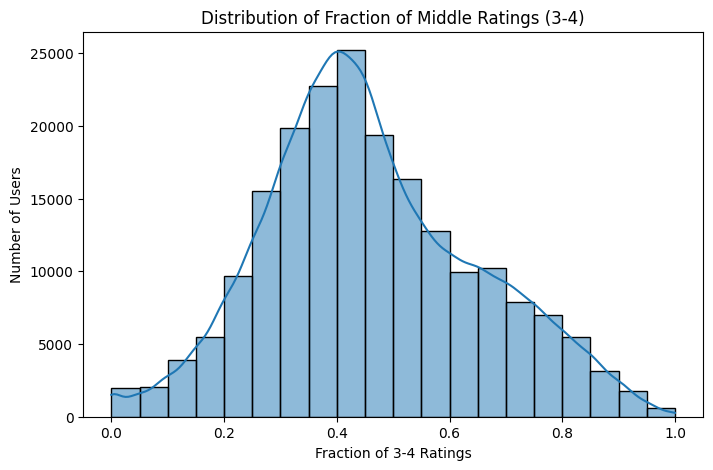

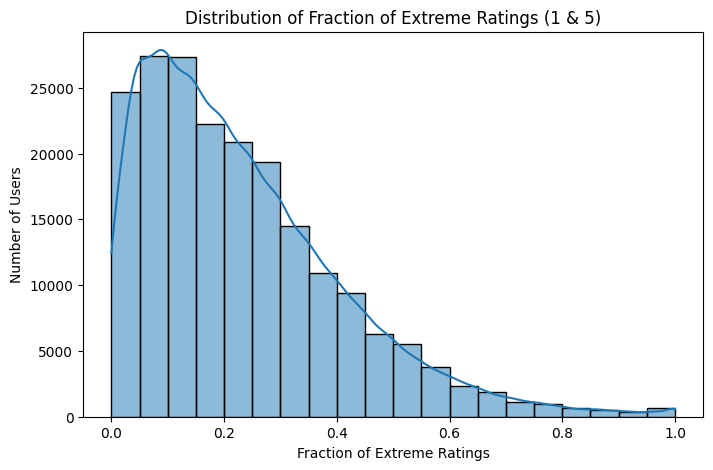

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of fraction of middle ratings
plt.figure(figsize=(8,5))
sns.histplot(df_user_behaviour.to_pandas()['frac_3_4'], bins=20, kde=True)
plt.title("Distribution of Fraction of Middle Ratings (3-4)")
plt.xlabel("Fraction of 3-4 Ratings")
plt.ylabel("Number of Users")
plt.show()

# Histogram of fraction of extremes
plt.figure(figsize=(8,5))
sns.histplot(df_user_behaviour.to_pandas()['frac_extremes'], bins=20, kde=True)
plt.title("Distribution of Fraction of Extreme Ratings (1 & 5)")
plt.xlabel("Fraction of Extreme Ratings")
plt.ylabel("Number of Users")
plt.show()

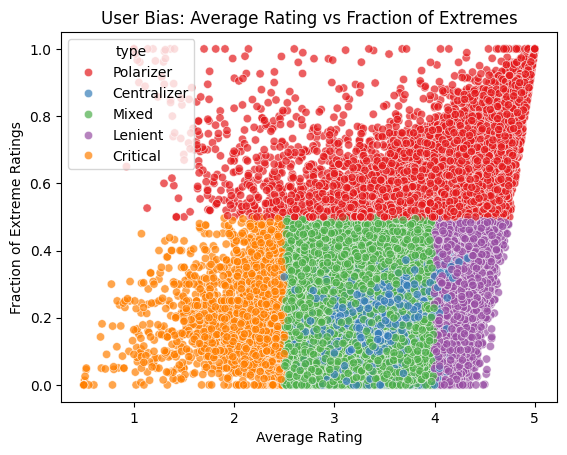

In [20]:
sns.scatterplot(
    data=df_user_behaviour.to_pandas(),
    x='avg_rating',
    y='frac_extremes',
    hue='type',
    palette='Set1',
    alpha=0.7
)
plt.title("User Bias: Average Rating vs Fraction of Extremes")
plt.xlabel("Average Rating")
plt.ylabel("Fraction of Extreme Ratings")
plt.show()

C:\Users\carla\AppData\Local\Temp\ipykernel_27308\3247021925.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


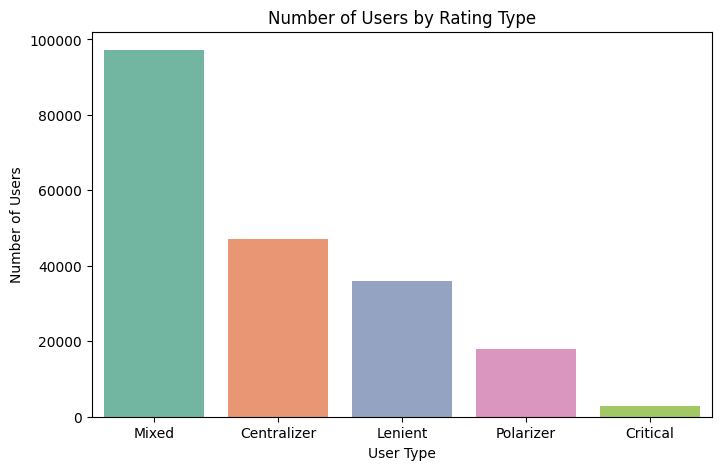

In [21]:
import polars as pl
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df_user_behaviour is already a Polars DataFrame from your DuckDB query
# Convert to Pandas for plotting
df_pd = df_user_behaviour.to_pandas()

# Bar chart: number of users per type
type_counts = df_pd['type'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Number of Users by Rating Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

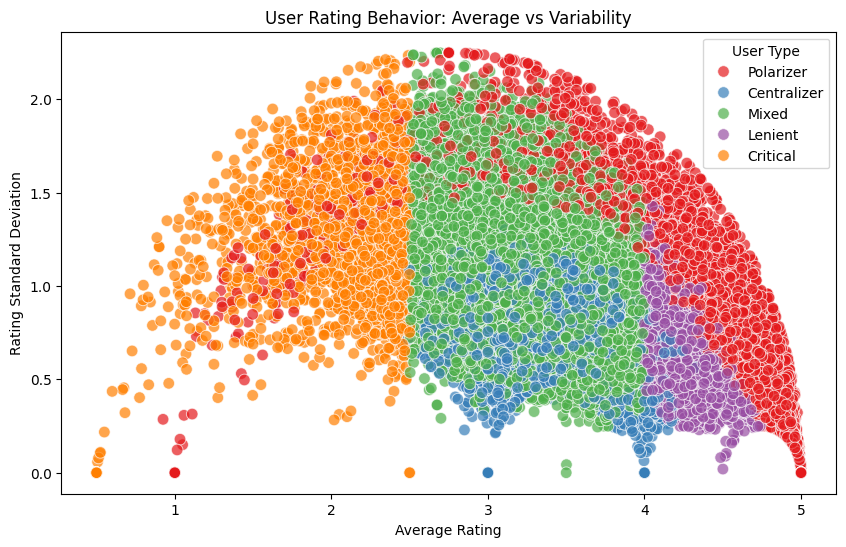

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_pd,
    x='avg_rating',
    y='rating_std',
    hue='type',
    palette='Set1',
    s=70,
    alpha=0.7
)
plt.title('User Rating Behavior: Average vs Variability')
plt.xlabel('Average Rating')
plt.ylabel('Rating Standard Deviation')
plt.legend(title='User Type')
plt.show()

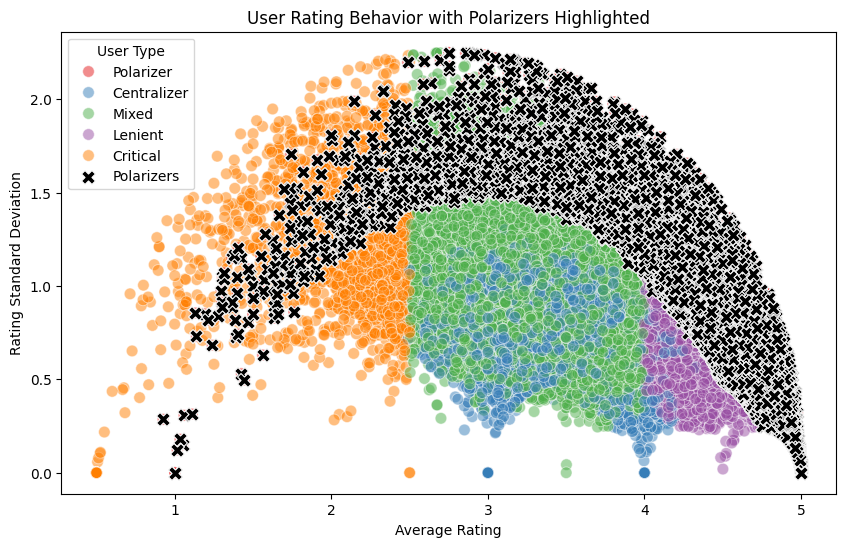

In [23]:
polarizers = df_pd[df_pd['type'] == 'Polarizer']

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_pd,
    x='avg_rating',
    y='rating_std',
    hue='type',
    palette='Set1',
    s=70,
    alpha=0.5
)
sns.scatterplot(
    data=polarizers,
    x='avg_rating',
    y='rating_std',
    color='black',
    s=100,
    marker='X',
    label='Polarizers'
)
plt.title('User Rating Behavior with Polarizers Highlighted')
plt.xlabel('Average Rating')
plt.ylabel('Rating Standard Deviation')
plt.legend(title='User Type')
plt.show()


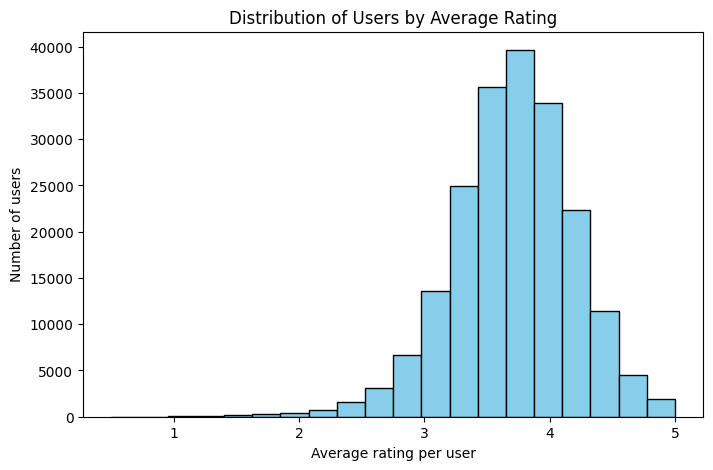

In [24]:
plt.figure(figsize=(8,5))
plt.hist(df_user_behaviour['avg_rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Average rating per user')
plt.ylabel('Number of users')
plt.title('Distribution of Users by Average Rating')
plt.show()

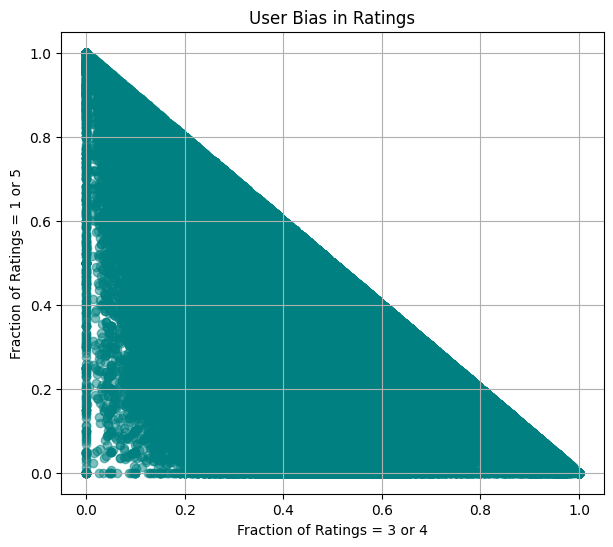

In [25]:
plt.figure(figsize=(7,6))
plt.scatter(df_user_behaviour['frac_3_4'], df_user_behaviour['frac_extremes'], alpha=0.5, c='teal')
plt.xlabel('Fraction of Ratings = 3 or 4')
plt.ylabel('Fraction of Ratings = 1 or 5')
plt.title('User Bias in Ratings')
plt.grid(True)
plt.show()

C:\Users\carla\AppData\Local\Temp\ipykernel_27308\4039975016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='avg_rating', data=df_user_behaviour.to_pandas(), palette="pastel")


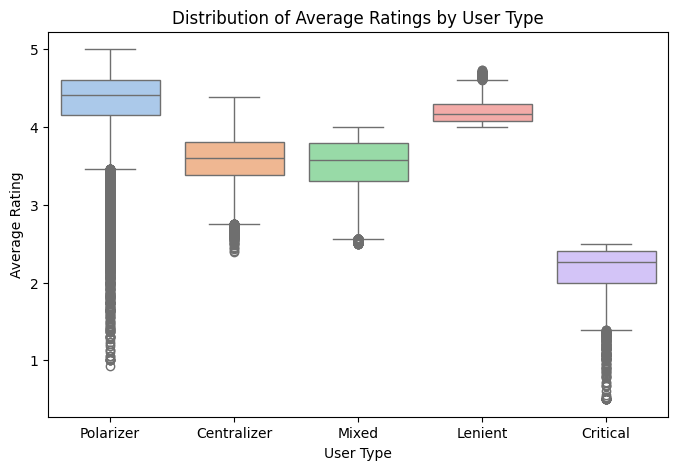

In [26]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='avg_rating', data=df_user_behaviour.to_pandas(), palette="pastel")
plt.xlabel('User Type')
plt.ylabel('Average Rating')
plt.title('Distribution of Average Ratings by User Type')
plt.show()

C:\Users\carla\AppData\Local\Temp\ipykernel_27308\2711227894.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  counts_df = df_user_behaviour.group_by("type").agg(pl.count().alias("count")).sort("count", descending=True)


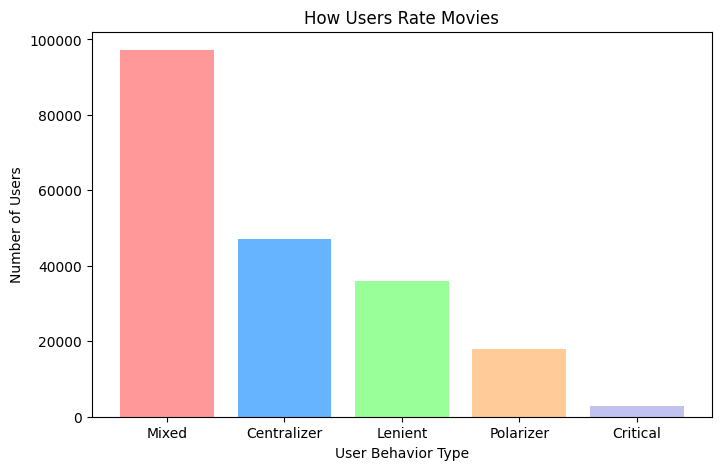

In [28]:
import matplotlib.pyplot as plt

# Correct Polars syntax for grouping and counting
counts_df = df_user_behaviour.group_by("type").agg(pl.count().alias("count")).sort("count", descending=True)
labels = counts_df["type"].to_list()
values = counts_df["count"].to_list()

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.xlabel("User Behavior Type")
plt.ylabel("Number of Users")
plt.title("How Users Rate Movies")
plt.show()

### Temporal & Evolution Analysis 

#### 11. How have ratings evolved over time - do older classics get rated differently from modern movies? 

#### 12. What is the relationship between a movie’s release year and its popularity (number of ratings)? 

#### 13. Are there temporal patterns in rating behavior (e.g., weekends, seasons, or time of day)? 

#### 14. Which decades produced the most highly rated movies on average, and why might that be? 

In [ ]:
df = conn.execute("""
WITH movie_decades AS (
  SELECT 
    movieId as movieId,
    title,
    year as release_year,
    CASE 
      WHEN year < 1950 THEN '1940s'
      WHEN year < 1960 THEN '1950s'
      WHEN year < 1970 THEN '1960s'
      WHEN year < 1980 THEN '1970s'
      WHEN year < 1980 THEN '1980s'
      WHEN year < 2000 THEN '1990s'
      ELSE '2000s+'
    END AS decade
  FROM movies_table
  WHERE year IS NOT NULL 
    AND year BETWEEN 1900 AND 2025
),
movie_ratings AS (
  SELECT 
    movieId,
    AVG(rating) AS avg_rating,
    COUNT(*) AS num_ratings
  FROM ratings_table
  GROUP BY movieId
)
SELECT 
  md.decade,
  ROUND(AVG(mr.avg_rating), 2) AS avg_decade_rating,
  COUNT(DISTINCT md.movieId) AS num_movies,
  SUM(mr.num_ratings) AS total_ratings
FROM movie_decades md
JOIN movie_ratings mr ON md.movieId = mr.movieId
GROUP BY md.decade
ORDER BY avg_decade_rating DESC
                  """).pl()
print(df)

shape: (6, 4)
┌────────┬───────────────────┬────────────┬───────────────┐
│ decade ┆ avg_decade_rating ┆ num_movies ┆ total_ratings │
│ ---    ┆ ---               ┆ ---        ┆ ---           │
│ str    ┆ f64               ┆ i64        ┆ decimal[38,0] │
╞════════╪═══════════════════╪════════════╪═══════════════╡
│ 1960s  ┆ 3.09              ┆ 4048       ┆ 883957        │
│ 1950s  ┆ 3.07              ┆ 3244       ┆ 599233        │
│ 1940s  ┆ 3.02              ┆ 6097       ┆ 651248        │
│ 1970s  ┆ 3.01              ┆ 5539       ┆ 1540407       │
│ 1990s  ┆ 3.0               ┆ 14002      ┆ 14515307      │
│ 2000s+ ┆ 2.99              ┆ 50678      ┆ 13772215      │
└────────┴───────────────────┴────────────┴───────────────┘


### Extended Insights 

#### 15. Which directors or franchises consistently achieve higher average ratings or show less variability? Using the links.csv file, join to external data (IMDB/TMDB) to analyze: Average rating per director or franchise; Whether certain directors have more consistent ratings.

In [ ]:
df_franchises = conn.execute("""
WITH title_patterns AS (
  SELECT 
    movieId,
    title,
    year,
    -- Extrair título base (remover numeração, anos, etc.)
    REGEXP_REPLACE(
      REGEXP_REPLACE(title, '\\s+(II|III|IV|V|VI|VII|VIII|IX|X|[0-9]+)$', ''),
      '\\s+\\([0-9]{4}\\)$', ''
    ) AS clean_title,
    title as original_title
  FROM movies_table
),
-- Filtrar palavras comuns
common_words AS (
  SELECT word FROM (VALUES 
    ('the'), ('a'), ('an'), ('les'), ('la'), ('le'),
    ('my'), ('your'), ('our'), ('their'),
    ('big'), ('little'), ('young'), ('old'), ('new'), ('last'),
    ('american'), ('british'), ('french'),
    ('city'), ('man'), ('men'), ('woman'), ('women'),
    ('love'), ('life'), ('death'), ('night'), ('day'),
    ('story'), ('tale'), ('adventure'), ('mystery'),
    ('girl'), ('boy'), ('super'), ('united'), ('flight'), ('spring'),
    ('summer'), ('winter'), ('autumn'), ('fall'), ('cherry'), ('malcolm'),
    ('apollo'), ('argo'), ('bambi'), ('chicago'), ('citizen'), ('coffee'),
    ('creep'), ('gypsy'), ('hatchet'), ('sniper'), ('tarzan'), ('wolf'),
    ('bad'), ('good'), ('black'), ('white'), ('red'), ('blue'),
    ('final'), ('first'), ('last'), ('dark'), ('blood')
  ) AS words(word)
),
-- Encontrar padrões de franchise
franchise_patterns AS (
  SELECT 
    LOWER(clean_title) AS franchise_pattern,
    COUNT(DISTINCT movieId) AS movie_count,
    COUNT(DISTINCT year) AS year_span,
    MIN(year) as first_year,
    MAX(year) as last_year,
    COUNT(DISTINCT original_title) as distinct_original_titles,
    COUNT(DISTINCT original_title)::float / COUNT(DISTINCT movieId) as unique_title_ratio
  FROM title_patterns
  WHERE LENGTH(clean_title) > 3
    AND clean_title NOT IN (SELECT word FROM common_words)
    AND clean_title !~ '(?i)^(the|a|an)\\s+'
  GROUP BY clean_title
  HAVING COUNT(DISTINCT movieId) >= 3
     AND COUNT(DISTINCT year) >= 2
     AND NOT BOOL_AND(original_title = clean_title)
),
-- Filmes das franchises
franchise_movies AS (
  SELECT 
    tp.movieId,
    tp.title,
    tp.year,
    pf.franchise_pattern AS franchise,
    pf.movie_count AS franchise_size,
    pf.year_span,
    pf.first_year,
    pf.last_year,
    pf.distinct_original_titles,
    pf.unique_title_ratio
  FROM title_patterns tp
  JOIN franchise_patterns pf ON LOWER(tp.clean_title) = pf.franchise_pattern
),
-- Ratings dos filmes
movie_ratings AS (
  SELECT 
    movieId,
    AVG(rating) AS avg_rating,
    COUNT(*) AS num_ratings,
    STDDEV(rating) AS rating_stddev
  FROM ratings_table
  GROUP BY movieId
),
-- Estatísticas finais
franchise_stats AS (
  SELECT 
    fm.franchise,
    COUNT(DISTINCT fm.movieId) as num_movies,
    fm.year_span,
    fm.first_year,
    fm.last_year,
    fm.distinct_original_titles,
    fm.unique_title_ratio,
    STRING_AGG(fm.title, ' | ' ORDER BY fm.year) AS movie_titles,
    ROUND(AVG(mr.avg_rating), 3) AS avg_rating,
    ROUND(AVG(mr.rating_stddev), 3) AS avg_stddev,
    SUM(mr.num_ratings) AS total_ratings,
    ROUND(MIN(mr.avg_rating), 2) AS min_rating,
    ROUND(MAX(mr.avg_rating), 2) AS max_rating,
    ROUND(MAX(mr.avg_rating) - MIN(mr.avg_rating), 2) AS rating_range
  FROM franchise_movies fm
  JOIN movie_ratings mr ON fm.movieId = mr.movieId
  GROUP BY fm.franchise, fm.year_span, fm.first_year, fm.last_year, 
           fm.distinct_original_titles, fm.unique_title_ratio
  HAVING COUNT(DISTINCT fm.movieId) >= 3
)
SELECT 
  franchise,
  num_movies,
  year_span,
  first_year,
  last_year,
  distinct_original_titles,
  ROUND(unique_title_ratio, 2) as unique_title_ratio,
  avg_rating,
  total_ratings,
  min_rating,
  max_rating,
  rating_range,
  movie_titles,
  -- Score de qualidade simplificado
  ROUND(
    (CASE WHEN num_movies BETWEEN 3 AND 8 THEN 0.8 WHEN num_movies BETWEEN 9 AND 15 THEN 0.9 ELSE 0.7 END) * 0.3 +
    (CASE WHEN avg_rating > 3.5 THEN 1.0 WHEN avg_rating > 3.0 THEN 0.7 WHEN avg_rating > 2.5 THEN 0.5 ELSE 0.3 END) * 0.4 +
    (CASE WHEN rating_range < 1.0 THEN 1.0 WHEN rating_range < 1.5 THEN 0.7 ELSE 0.3 END) * 0.2 +
    (CASE WHEN unique_title_ratio > 0.8 THEN 1.0 
          WHEN unique_title_ratio > 0.6 THEN 0.7 
          ELSE 0.4 END) * 0.1, 2
  ) as quality_score
FROM franchise_stats
WHERE avg_rating > 3.0
  AND total_ratings > 500
  AND year_span >= 2
  AND unique_title_ratio >= 0.7
  AND franchise NOT IN ('girl', 'boy', 'super', 'united', 'flight', 'spring', 
                       'summer', 'winter', 'autumn', 'fall', 'cherry', 'malcolm',
                       'apollo', 'argo', 'bambi', 'chicago', 'citizen', 'coffee',
                       'creep', 'gypsy', 'hatchet', 'sniper', 'tarzan', 'wolf',
                       'bad', 'good', 'black', 'white', 'red', 'blue', 'final')
ORDER BY quality_score DESC, num_movies DESC, total_ratings DESC
""").df()

In [ ]:
# Display compacto com as métricas solicitadas
print("🎬 FRANCHISES - MÉTRICAS DETALHADAS")
print("=" * 130)
print(f"{'#':<3} {'Franchise':<20} {'Movies':<8} {'Avg Rating':<12} {'Std Dev':<10} {'Rating Range':<14} {'Min':<8} {'Max':<8} {'Consistency':<12}")
print("-" * 130)

for idx, row in df_franchises.iterrows():
    # Verificar quais colunas estão disponíveis e usar valores padrão se necessário
    movies = row['num_movies']
    avg_rating = row.get('avg_rating', 0)
    std_dev = row.get('avg_stddev', row.get('rating_stddev', 0))
    min_rating = row.get('min_rating', 0)
    max_rating = row.get('max_rating', 0)
    rating_range = row.get('rating_range', 0)
    
    # Calcular consistency ratio se não estiver disponível
    if 'consistency_ratio' in row:
        consistency = row['consistency_ratio']
    else:
        consistency = avg_rating / std_dev if std_dev > 0 else 0
    
    print(f"{idx+1:<3} {row['franchise']:<20} {movies:<8} {avg_rating:<12.3f} {std_dev:<10.3f} "
          f"{rating_range:<14.2f} {min_rating:<8.2f} {max_rating:<8.2f} {consistency:<12.2f}")

# Detalhes expandidos
print(f"\n{'═' * 100}")
print("📊 ANÁLISE DETALHADA POR FRANCHISE:")
print(f"{'═' * 100}")

for idx, row in df_franchises.iterrows():
    # Calcular métricas
    avg_rating = row.get('avg_rating', 0)
    std_dev = row.get('avg_stddev', row.get('rating_stddev', 0))
    min_rating = row.get('min_rating', 0)
    max_rating = row.get('max_rating', 0)
    rating_range = row.get('rating_range', 0)
    consistency = avg_rating / std_dev if std_dev > 0 else 0
    
    # Classificar consistência
    if consistency >= 3.5:
        consistency_label = "EXCELENTE 🏅"
    elif consistency >= 2.5:
        consistency_label = "ALTA 👍"
    elif consistency >= 1.5:
        consistency_label = "MÉDIA ✅"
    else:
        consistency_label = "BAIXA ⚠️"
    
    print(f"\n🎯 #{idx+1} {row['franchise'].upper()}")
    print("─" * 60)
    
    # Métricas principais
    print(f"   📈 MÉTRICAS DE AVALIAÇÃO:")
    print(f"      • Rating Médio:    {avg_rating:.3f} ⭐")
    print(f"      • Desvio Padrão:   {std_dev:.3f}")
    print(f"      • Variação:        {min_rating:.2f} - {max_rating:.2f} (range: {rating_range:.2f})")
    print(f"      • Consistência:    {consistency:.2f} ({consistency_label})")
    
    # Informações adicionais
    print(f"   📊 ESTATÍSTICAS:")
    print(f"      • Total de Filmes: {row['num_movies']}")
    print(f"      • Títulos Únicos:  {row['distinct_original_titles']}/{row['num_movies']} ({(row['distinct_original_titles']/row['num_movies'])*100:.0f}%)")
    print(f"      • Período:         {row['first_year']} - {row['last_year']} ({row['year_span']} anos)")
    
    if 'total_ratings' in row:
        print(f"      • Total Ratings:   {row['total_ratings']:,}")
    
    # Lista de filmes
    if 'movie_titles' in row:
        print(f"   🎞️ FILMES:")
        titles = row['movie_titles'].split(' | ')
        for title in titles:
            print(f"      • {title}")

print(f"\n{'═' * 100}")
print(f"📋 RESUMO: {len(df_franchises)} franchises identificadas")
print(f"🎯 Filtros: Rating > 3.0, Títulos únicos ≥70%, Mínimo 500 ratings")

🎬 FRANCHISES - MÉTRICAS DETALHADAS
#   Franchise            Movies   Avg Rating   Std Dev    Rating Range   Min      Max      Consistency 
----------------------------------------------------------------------------------------------------------------------------------
1   toy story            4        3.782        0.000      0.31           3.59     3.90     0.00        
2   don't hug me i'm scared 4        3.810        0.000      0.22           3.70     3.91     0.00        
3   kung fu panda        3        3.549        0.000      0.12           3.50     3.62     0.00        
4   ip man               3        3.782        0.000      0.29           3.64     3.94     0.00        
5   lethal weapon        4        3.351        0.000      0.57           3.13     3.70     0.00        
6   spider-man           3        3.267        0.000      0.61           2.87     3.48     0.00        
7   mission: impossible  3        3.254        0.000      0.43           2.98     3.41     0.00        

#### 16. Is there a relationship between a film’s popularity (number of ratings) and its average score - do popular movies tend to be better or just more visible?

In [ ]:
# SQL query: number of ratings and average rating per movie
sql = """
SELECT
    r.movieId,
    m.title,
    COUNT(r.rating) AS num_ratings,
    AVG(r.rating) AS avg_rating
FROM ratings_table r
JOIN movies_table m ON r.movieId = m.movieId
GROUP BY r.movieId, m.title
ORDER BY num_ratings DESC
LIMIT 100
"""

# Execute and get DataFrame (sem usar .pl() para evitar conflitos)
df_movie_stats = conn.execute(sql).df()
print(df_movie_stats.head(20))
print(f"\nTotal de filmes retornados: {len(df_movie_stats)}")

    movieId                                              title  num_ratings  \
0       318                          Shawshank Redemption, The       102929   
1       356                                       Forrest Gump       100296   
2       296                                       Pulp Fiction        98409   
3      2571                                        Matrix, The        93808   
4       593                          Silence of the Lambs, The        90330   
5       260                 Star Wars: Episode IV - A New Hope        85010   
6      2959                                         Fight Club        77332   
7       480                                      Jurassic Park        75233   
8       527                                   Schindler's List        73849   
9      4993  Lord of the Rings: The Fellowship of the Ring,...        73122   
10     1196     Star Wars: Episode V - The Empire Strikes Back        72151   
11      110                                         

In [ ]:
# Compute correlation using DuckDB
corr_sql = """
SELECT CORR(CAST(num_ratings AS DOUBLE), avg_rating) AS correlation
FROM (
    SELECT
        COUNT(r.rating) AS num_ratings,
        AVG(r.rating) AS avg_rating
    FROM ratings_table r
    GROUP BY r.movieId
) t
"""

corr_result = conn.execute(corr_sql).pl()
print("Correlation between popularity and average rating:", corr_result[0,0])

#Positive correlation → popular movies tend to have higher ratings
#Near zero → popularity and quality are independent


Correlation between popularity and average rating: 0.09760527795496896


In [ ]:
# Binned popularity analysis
sql = """
WITH movie_stats AS (
    SELECT
        m.movieId,
        COUNT(r.rating) AS num_ratings,
        AVG(r.rating) AS avg_rating
    FROM ratings_table r
    JOIN movies_table m ON r.movieId = m.movieId
    GROUP BY m.movieId
),
binned AS (
    SELECT
        *,
        CASE
            WHEN num_ratings <= 50 THEN 'Very Low'
            WHEN num_ratings <= 200 THEN 'Low'
            WHEN num_ratings <= 1000 THEN 'Medium'
            ELSE 'High'
        END AS popularity_bin
    FROM movie_stats
)
SELECT
    popularity_bin,
    AVG(avg_rating) AS mean_rating_in_bin,
    COUNT(*) AS num_movies_in_bin
FROM binned
GROUP BY popularity_bin
ORDER BY mean_rating_in_bin DESC
"""

df_bin_summary = conn.execute(sql).pl()
print(df_bin_summary)
#This already answers the question: More popular movies tend to be rated higher. Low-visibility films tend to score much lower, suggesting many obscure movies are rated poorly — not just unseen.



shape: (4, 3)
┌────────────────┬────────────────────┬───────────────────┐
│ popularity_bin ┆ mean_rating_in_bin ┆ num_movies_in_bin │
│ ---            ┆ ---                ┆ ---               │
│ str            ┆ f64                ┆ i64               │
╞════════════════╪════════════════════╪═══════════════════╡
│ High           ┆ 3.398696           ┆ 4395              │
│ Medium         ┆ 3.248581           ┆ 4907              │
│ Low            ┆ 3.185285           ┆ 6577              │
│ Very Low       ┆ 2.944994           ┆ 68523             │
└────────────────┴────────────────────┴───────────────────┘


#### 17. How do a movie’s genre, number of ratings, and average rating interact — are some genres more likely to be popular but lower-rated, or niche but highly-rated?

In [ ]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

unpivot_sql = " UNION ALL ".join([
    f"""
    SELECT
        '{g}' AS genre,
        r.rating
    FROM ratings_table r
    JOIN movies_table m ON r.movieId = m.movieId
        AND m."{g}" = 1
    """ for g in genre_cols
])

sql = f"""
SELECT
    genre,
    COUNT(*) AS num_ratings,
    AVG(rating) AS avg_rating
FROM (
    {unpivot_sql}
) t
GROUP BY genre
ORDER BY num_ratings DESC
"""

df_genre_stats = conn.execute(sql).pl()
print(df_genre_stats)

shape: (18, 3)
┌─────────────┬─────────────┬────────────┐
│ genre       ┆ num_ratings ┆ avg_rating │
│ ---         ┆ ---         ┆ ---        │
│ str         ┆ i64         ┆ f64        │
╞═════════════╪═════════════╪════════════╡
│ Drama       ┆ 13973235    ┆ 3.682455   │
│ Comedy      ┆ 11206638    ┆ 3.432392   │
│ Action      ┆ 9665213     ┆ 3.476407   │
│ Thriller    ┆ 8679362     ┆ 3.531708   │
│ Adventure   ┆ 7590522     ┆ 3.523439   │
│ …           ┆ …           ┆ …          │
│ War         ┆ 1594110     ┆ 3.791699   │
│ Musical     ┆ 1159516     ┆ 3.554277   │
│ Western     ┆ 596654      ┆ 3.600175   │
│ Documentary ┆ 427175      ┆ 3.691209   │
│ Film-Noir   ┆ 304710      ┆ 3.915774   │
└─────────────┴─────────────┴────────────┘


In [ ]:
print(df_movies.columns)

['movieId', 'title', 'year', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


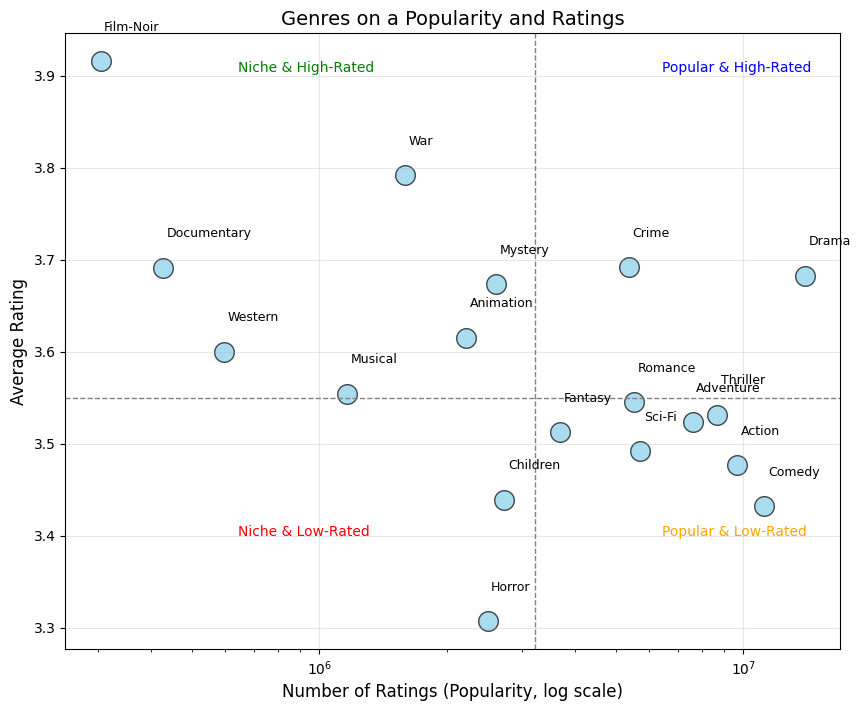

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract axes
x = df_genre_stats["num_ratings"].to_numpy()
y = df_genre_stats["avg_rating"].to_numpy()
labels = df_genre_stats["genre"].to_list()

# Create figure
plt.figure(figsize=(10,8))

# Scatter points
plt.scatter(x, y, s=200, alpha=0.7, color='skyblue', edgecolor='black')

# Log scale for popularity
plt.xscale('log')

# Draw vertical and horizontal lines for “center” (median values)
median_x = np.median(x)
median_y = np.median(y)
plt.axvline(median_x, color='gray', linestyle='--', lw=1)
plt.axhline(median_y, color='gray', linestyle='--', lw=1)


# Add labels 
for i, label in enumerate(labels):
    plt.text(
        x[i]*1.02,          # horizontal offset
        y[i]+0.03,          # vertical offset
        label,
        fontsize=9,
        ha='left',
        va='bottom'
    )

# Titles and labels
plt.xlabel("Number of Ratings (Popularity, log scale)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Genres on a Popularity and Ratings", fontsize=14)

# Add quadrant labels
plt.text(median_x/5, median_y*1.10, 'Niche & High-Rated', fontsize=10, color='green')
plt.text(median_x*2, median_y*1.10, 'Popular & High-Rated', fontsize=10, color='blue')
plt.text(median_x/5, median_y-0.15, 'Niche & Low-Rated', fontsize=10, color='red')
plt.text(median_x*2, median_y-0.15, 'Popular & Low-Rated', fontsize=10, color='orange')

plt.grid(True, alpha=0.3)
plt.show()

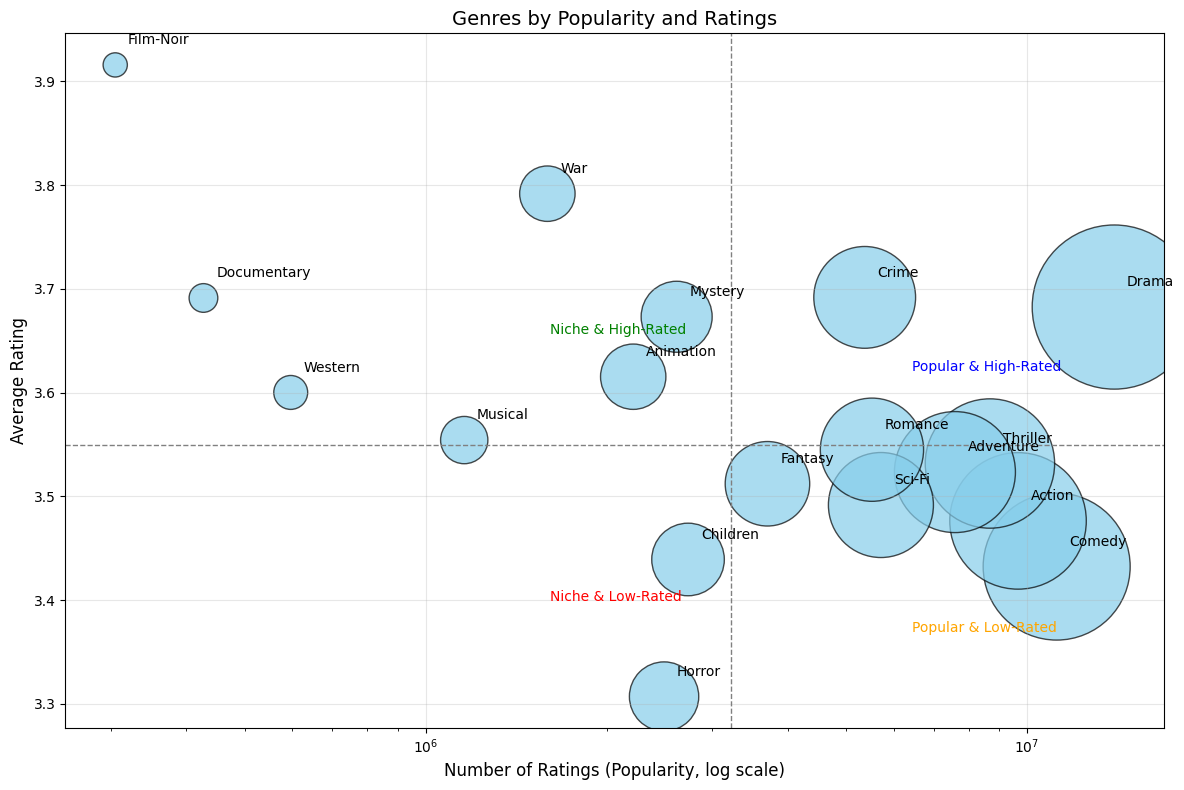

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# If you don't have a num_movies column, you can use num_ratings as bubble size
x = df_genre_stats["num_ratings"].to_numpy()
y = df_genre_stats["avg_rating"].to_numpy()
labels = df_genre_stats["genre"].to_list()
bubble_size = df_genre_stats["num_ratings"].to_numpy() / 1000  # adjust for visibility

plt.figure(figsize=(12,8))

# Scatter points
plt.scatter(x, y, s=bubble_size, alpha=0.7, color='skyblue', edgecolor='black')

# Log scale for popularity
plt.xscale('log')

# Median lines for quadrant
median_x = np.median(x)
median_y = np.median(y)
plt.axvline(median_x, color='gray', linestyle='--', lw=1)
plt.axhline(median_y, color='gray', linestyle='--', lw=1)

# Add labels near points
for i, label in enumerate(labels):
    plt.text(x[i]*1.05, y[i]+0.02, label, fontsize=10, ha='left')

# Titles and axis labels
plt.xlabel("Number of Ratings (Popularity, log scale)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Genres by Popularity and Ratings", fontsize=14)

# Quadrant labels
plt.text(median_x * 0.5, median_y * 1.03, 'Niche & High-Rated', fontsize=10, color='green')
plt.text(median_x * 2, median_y * 1.02, 'Popular & High-Rated', fontsize=10, color='blue')
plt.text(median_x * 0.5, median_y - 0.15, 'Niche & Low-Rated', fontsize=10, color='red')
plt.text(median_x * 2, median_y - 0.18, 'Popular & Low-Rated', fontsize=10, color='orange')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

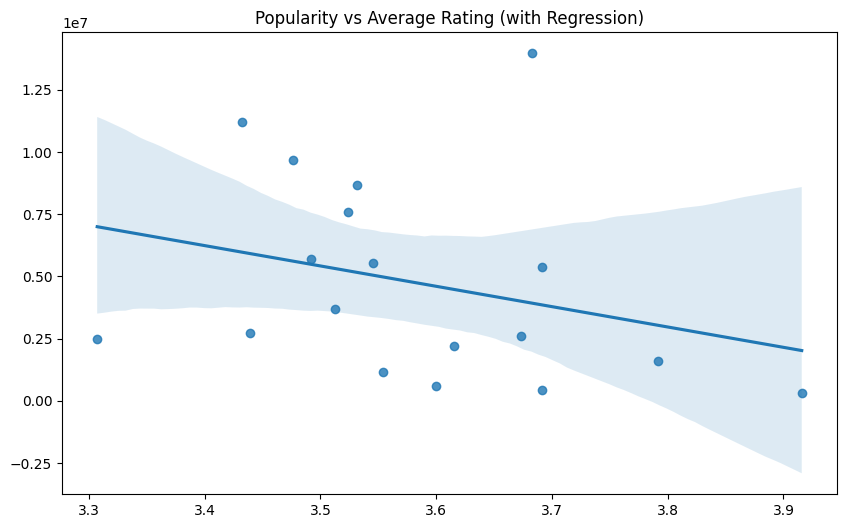

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.regplot(
    x="avg_rating",
    y="num_ratings",
    data=df_genre_stats
)
plt.title("Popularity vs Average Rating (with Regression)")
plt.show()

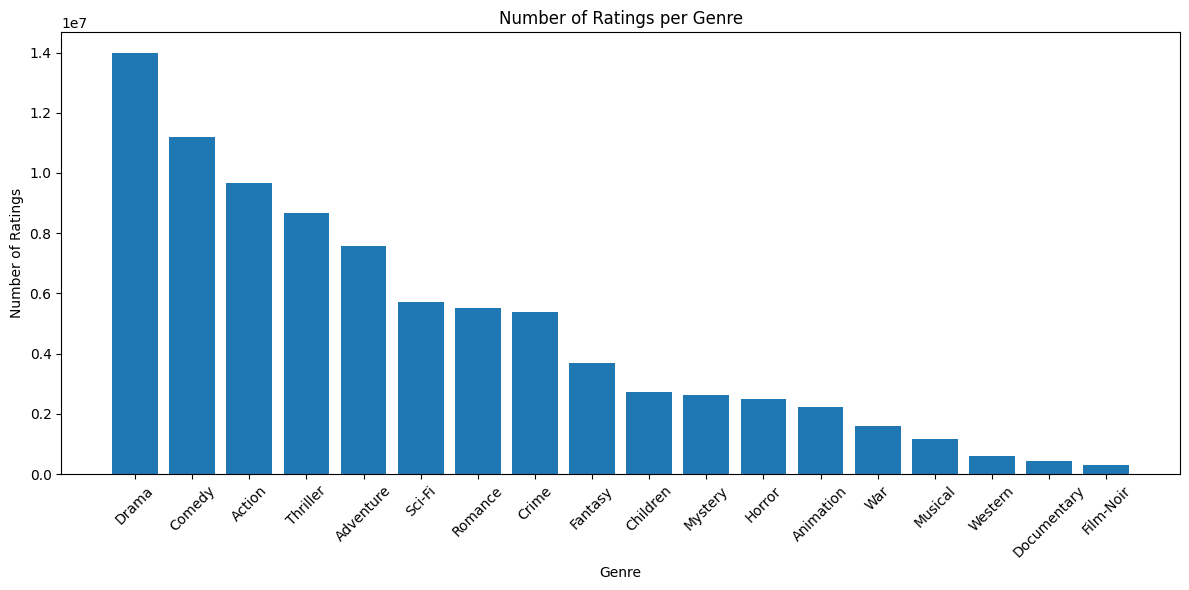

In [ ]:
import matplotlib.pyplot as plt

# Sort by num_ratings descending
df_plot = df_genre_stats.sort("num_ratings", descending=True).to_pandas()

plt.figure(figsize=(12,6))
plt.bar(df_plot["genre"], df_plot["num_ratings"])
plt.title("Number of Ratings per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

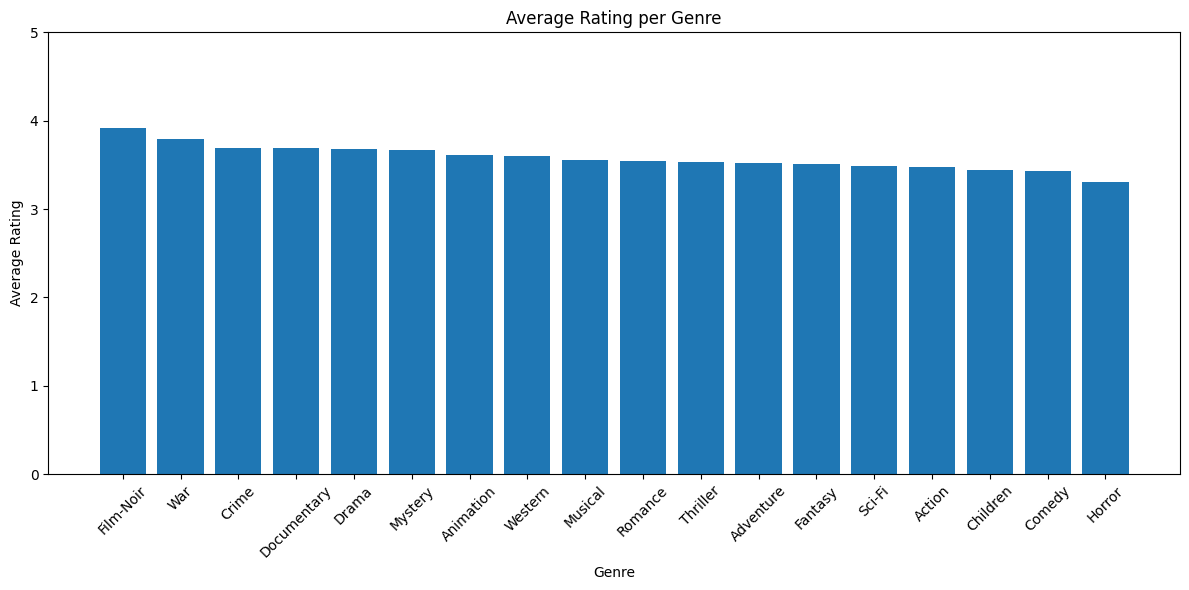

In [ ]:
df_plot = df_genre_stats.sort("avg_rating", descending=True).to_pandas()

plt.figure(figsize=(12,6))
plt.bar(df_plot["genre"], df_plot["avg_rating"])
plt.title("Average Rating per Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

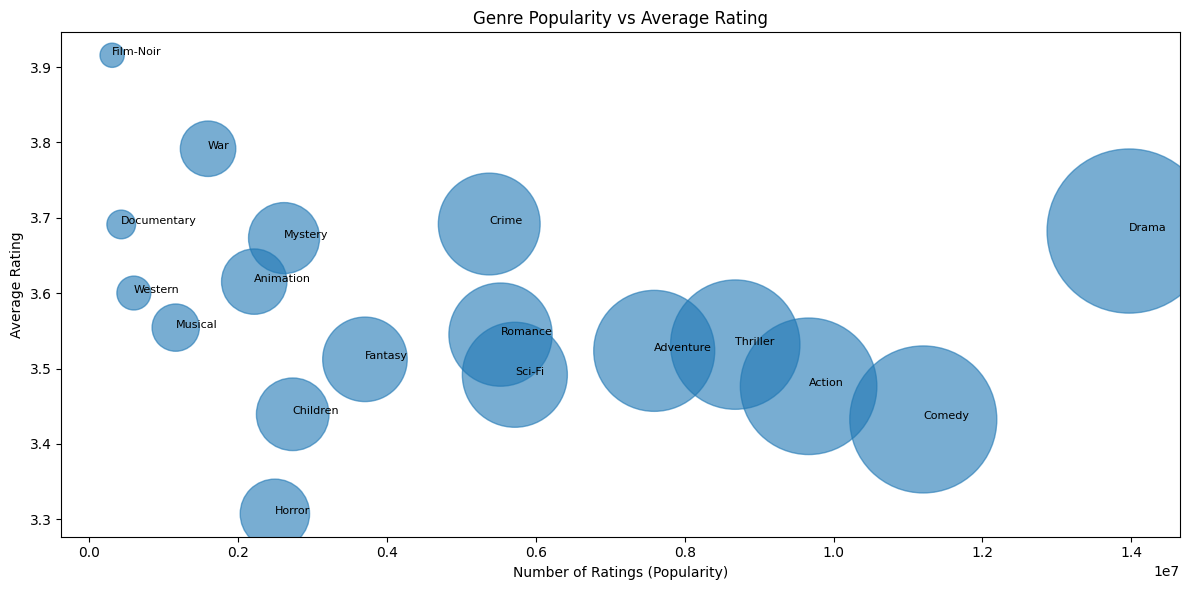

In [ ]:
df_plot = df_genre_stats.to_pandas()

plt.figure(figsize=(12,6))
plt.scatter(
    df_plot["num_ratings"],
    df_plot["avg_rating"],
    s=df_plot["num_ratings"]/1000,  # adjust bubble size
    alpha=0.6
)

# Label each bubble
for i, row in df_plot.iterrows():
    plt.text(
        row["num_ratings"],
        row["avg_rating"],
        row["genre"],
        fontsize=8
    )

plt.title("Genre Popularity vs Average Rating")
plt.xlabel("Number of Ratings (Popularity)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()